In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [33]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Step 1: Data Collection
df = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')

In [35]:
# Step 2: Data Preprocessing
# Rename 'Genre' column to 'Gender' for better clarity
df['Gender'] = df['Genre']
df = df.drop('Genre', axis=1)

# Convert 'Gender' column to numerical (Male=0, Female=1)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Select features for clustering
X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Data scaling for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
# Step 4: Determine Number of Clusters

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Function to evaluate clustering performance based on criteria
def evaluate_clustering(labels, X, model=None):
    # Step 9: Model Evaluation
    # 1. Silhouette Score
    silhouette = silhouette_score(X, labels)

    # 2. Davies-Bouldin Index
    db_index = davies_bouldin_score(X, labels)

    # 3. Calinski-Harabasz Index (Variance Ratio Criterion)
    calinski_harabasz = calinski_harabasz_score(X, labels)

    print(f'Silhouette Score: {silhouette}')
    print(f'Davies-Bouldin Index: {db_index}')
    print(f'Calinski-Harabasz Index: {calinski_harabasz}')

    # 4. Inertia (Within-Cluster Sum of Squares) - Only for KMeans
    if model is not None and hasattr(model, 'inertia_'):
        inertia = model.inertia_
        print(f'Inertia (Within-Cluster Sum of Squares): {inertia}')
        return silhouette, db_index, calinski_harabasz, inertia
    else:
        return silhouette, db_index, calinski_harabasz


In [37]:
# Step 5: Cluster Data using K-Means
print("K-Means Clustering:")
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
evaluate_clustering(kmeans_labels, X_scaled, model=kmeans)

# Step 5: Cluster Data using DBSCAN
print("\nDBSCAN Clustering:")
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

# For DBSCAN, remove noise points (labeled as -1) before evaluation
dbscan_labels_clean = dbscan_labels[dbscan_labels != -1]
X_dbscan_clean = X_scaled[dbscan_labels != -1]
evaluate_clustering(dbscan_labels_clean, X_dbscan_clean)

# Step 5: Cluster Data using Gaussian Mixture Model (GMM)
print("\nGaussian Mixture Model Clustering:")
gmm = GaussianMixture(n_components=5, covariance_type='full', random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)
evaluate_clustering(gmm_labels, X_scaled)


K-Means Clustering:
Silhouette Score: 0.27191023466188324
Davies-Bouldin Index: 1.181091452406171
Calinski-Harabasz Index: 62.12634193286723
Inertia (Within-Cluster Sum of Squares): 351.7432061711911

DBSCAN Clustering:
Silhouette Score: 0.5395188047455788
Davies-Bouldin Index: 0.6304503931588126
Calinski-Harabasz Index: 116.46147905799742

Gaussian Mixture Model Clustering:
Silhouette Score: 0.2216401485402198
Davies-Bouldin Index: 1.2106137671043733
Calinski-Harabasz Index: 45.81743407409341


(0.2216401485402198, 1.2106137671043733, 45.81743407409341)

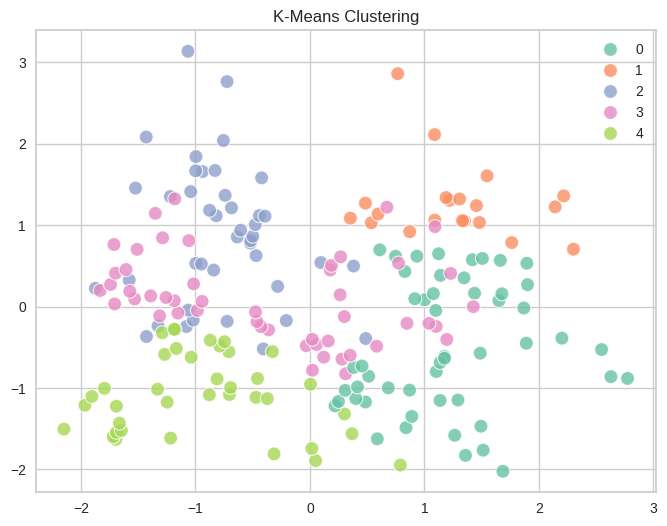

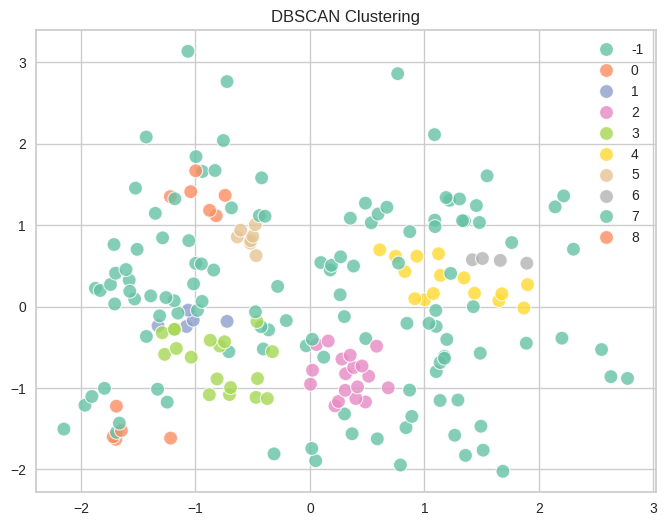

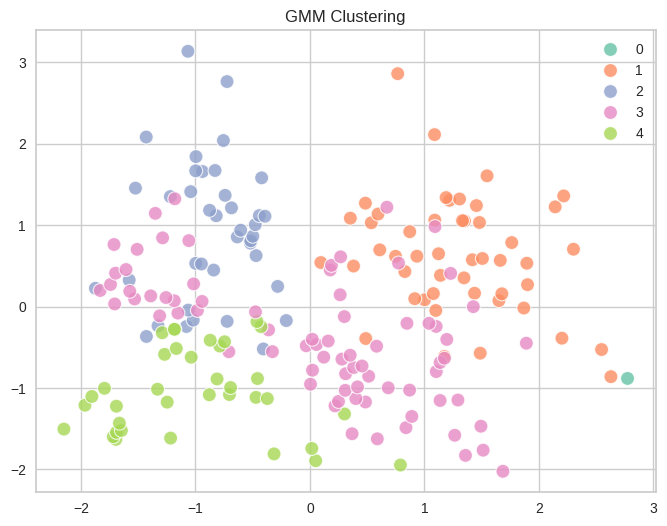

In [38]:
# Step 6: Visualize Clusters using PCA-reduced data
def plot_clusters(X_pca, labels, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='Set2', s=100, alpha=0.8)
    plt.title(title)
    plt.show()

# Visualize K-Means clusters
plot_clusters(X_pca, kmeans_labels, 'K-Means Clustering')

# Visualize DBSCAN clusters
plot_clusters(X_pca, dbscan_labels, 'DBSCAN Clustering')

# Visualize GMM clusters
plot_clusters(X_pca, gmm_labels, 'GMM Clustering')

In [39]:
# Step 7: Interpret Results
print("\nK-Means Cluster Means:")
df['Cluster'] = kmeans_labels
print(df.groupby('Cluster').mean())



K-Means Cluster Means:
         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                      
0         65.333333  56.470588           46.098039               39.313725   
1        159.500000  39.500000           85.150000               14.050000   
2        100.809524  28.690476           60.904762               70.238095   
3        151.510204  37.897959           82.122449               54.448980   
4         50.526316  27.315789           38.842105               56.210526   

           Gender  
Cluster            
0        0.490196  
1        0.000000  
2        0.000000  
3        1.000000  
4        1.000000  


## Step 8: Model Evaluation
### Based on the results for the selected dataset from "Mall Customers", we can conclude that DBSCAN Clustering give better results or evaluation parameters than other Clustring techniques.